#  Machine Learning - Spring 2019

## Mini-Project I

### K-Means Clustering Algorithm

Created on: March 10, 2019 by Ralph Florent <r.florent@jacobs-university.de>

#### Description
Write programmatically re-usable K-means clustering algorithm.

#### Summary
The script below allows to compute the K-means clustering Machine Learning algorithm. This script was inspired by the pseudocode/algorithm from the **Dr. Herbert Jaeger**'s Machine Learning Lecture Notes. The algorithm is described in the following steps:
* Given: a training data set (xi)i=1,...,N ∈ Rn, and a number K of clusters that one maximally wishes to obtain.
* Initialization: randomly assign the training points to K sets Sj (j = 1, . . . , K).
* Repeat: For each set Sj, compute the mean µj = Sum(x)/|Sj| for x ∈ Sj. This mean vector µj is the “center of gravity” of the vector cluster Sj. Create new sets S'j by putting each data point xi into that set S'j where Modulus(xi − µj) is minimal. If some S'j remains empty, dismiss it and reduce K to K' by subtractring the number of dismissed empty sets (this happens rarely). Put Sj = S'j (for the nonempty sets) and K = K'.
* Termination: Stop when in one iteration the sets remain unchanged.

The algorithm was tested on the OCR datasets from the `DigitsBasicsRoutine.zip`, which was provided by Professor H. Jaeger, Machine Learning Professor at [Jacobs University Bremen](https://www.jacobs-university.de).

In [10]:
# -*- coding: utf-8 -*-
#
# Created on March 10, 2019
# Author: Ralph Florent <r.florent@jacobs-university.de>

# Import relevant libraries
import matplotlib.pyplot as plt
import numpy as np
import random
from copy import deepcopy


### START: scripts
PATTERN_SIZE = 200

def get_data_points(digit = -1):
    filepath = './assets/mfeat-pix.txt'
    data_points = np.loadtxt(filepath)
    
    if(digit >= 0 and digit <= 9):
        START = digit * PATTERN_SIZE
        END   = START + PATTERN_SIZE
        return data_points[START:END] 
    return data_points # arr([ points[], ..., N])

def assign_randomly(data, K):
    random.shuffle(data)
    if K > len(data): # protect array
        K = len(data)
    return np.array( [data[i::K] for i in range(K)]) # arr([ arr(cluster[ arr(points[]),...]), ..., K])

def compute_mean_cluster(cluster):
    length = len(cluster) # cluster's size
    if length == 0: # avoid division by zero exception
        return None
    accumulator = np.zeros( len(cluster[0]) ) # array of zeros
    for i in range(length):
        accumulator += np.asarray(cluster[i]) # add operations arrays
    return accumulator / length  # arr(points[...])
        

def get_distance(a, b):
    if len(a) != len(b):
        return 0
    a, b = np.asarray(a), np.asarray(b)
    return np.sqrt( np.mean( (a - b)**2 ) )

def to_list(nested_array):
    # convert nested arrays into nested lists 
    if not isinstance(nested_array, np.ndarray):
        return nested_array
    return [ to_list(arr) for arr in nested_array]

def to_array(clusters_list):
    if not isinstance(clusters_list, list):
        return clusters_list
    return np.array([ to_array(l) for l in clusters_list ])

def get_codebooks(clusters):
    return np.array([ compute_mean_cluster(c) for c in clusters])
    
def k_mean(data, K = 1):
    
    # K random positions to assign Set of clusters Sj
    clusters  = assign_randomly(data, K)
    
    # Iterate over the Sj while computing Modulus(xi − µj) 
    while True:
        clone_clusters = [[] for i in range(K)] # clone clusters: list
        
        for point in data:
            distances = [] # between data points and mean cluster
            for j in range(K):
                # compute mean of the cluster: codebook vector
                mean_cluster = compute_mean_cluster(clusters[j]) # array
                
                # compute distance between data point and mean cluster 
                distance = get_distance(point, mean_cluster)
                distances.append(distance)
                
            # Put point into the cluster where the distance is minimal 
            which_cluster = distances.index( min(distances) )
            clone_clusters[ which_cluster ].append( list(point) )
        
        # dismiss empty sets
        # if hasEmptySet(clone_clusters):
        #    K--
        
        # check if sets remain unchanged 
        if clone_clusters == to_list(clusters): break
            
        # update to optimal clusters
        clusters  = to_array( deepcopy(clone_clusters) )
        
    return clusters

# inspired by: https://gist.github.com/soply/f3eec2e79c165e39c9d540e916142ae1
def plot_figure(dataset):
    n_vectors = len(dataset)
        
    fig = plt.figure(figsize=(11, 6.5))
    for i in range(n_vectors):
        graph = fig.add_subplot(10, 20, i + 1)
        graph.imshow(dataset[i].reshape(16, 15), cmap='binary')
        graph.axis('off')
    plt.show()

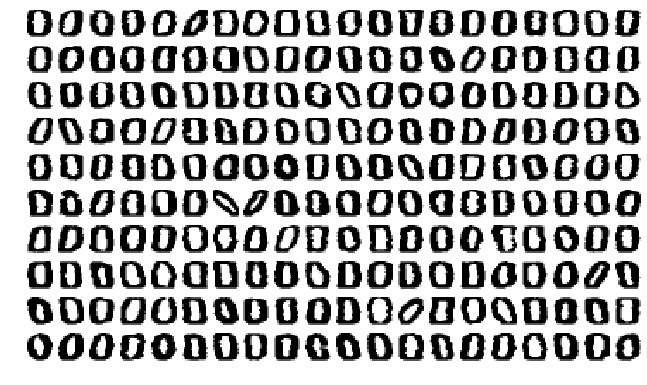

In [11]:
# Load the digit-class data points from the OCR datasets.
zeros = get_data_points(0)
# ones  = get_data_points(1)
# ...
# nines = get_data_points(9)

# Visualize dataset for the zeros dataset
plot_figure(zeros)

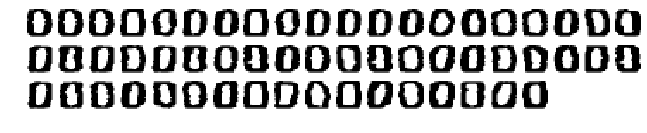

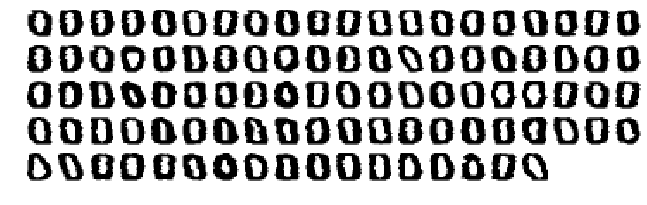

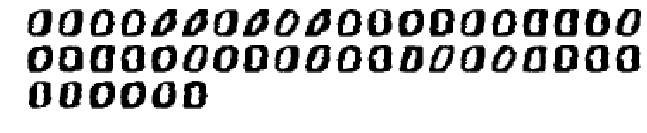

In [12]:
# Run k-means algorithm on the data set for the zeros class pattern
#zeros_clustered_1   = k_mean(zeros, 1)
#zeros_clustered_2   = k_mean(zeros, 2)
zeros_clustered_3   = k_mean(zeros, 3)
# Visualize dataset for the zeros_clustered_1 dataset
for cluster in zeros_clustered_3:
    plot_figure(cluster)

#zeros_clustered_200 = k_mean(zeros, 200)

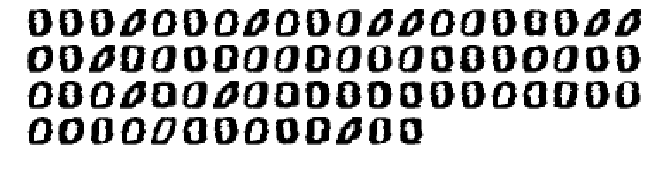

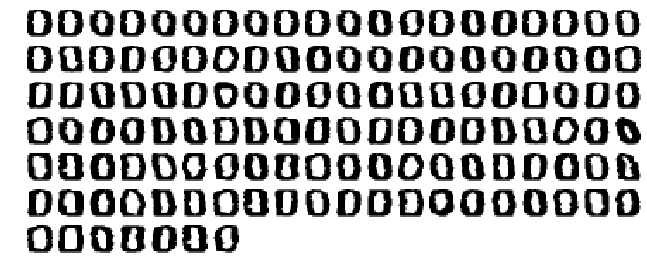

In [13]:
# Run k-means algorithm on the data set for the zeros class pattern
#zeros_clustered_1   = k_mean(zeros, 1)
zeros_clustered_2   = k_mean(zeros, 2)
#zeros_clustered_3   = k_mean(zeros, 3)
# Visualize dataset for the zeros_clustered_1 dataset
for cluster in zeros_clustered_2:
    plot_figure(cluster)

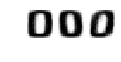

In [14]:
codebooks_cluster_3 = get_codebooks(zeros_clustered_3)
plot_figure(codebooks_cluster_3)